<a href="https://colab.research.google.com/github/blueeagle100/stereo_vision_starter/blob/main/0_camera_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Camera Model**

In this tutorial we will learn about the basc pinhole camera model and about camera calibration

Possibly change this to only be about camera models

For an excerise model different types of distortions and apply them to a checkerboard image

## **Pinhole Camera Model**

The basic pinholde camera model is shown below.

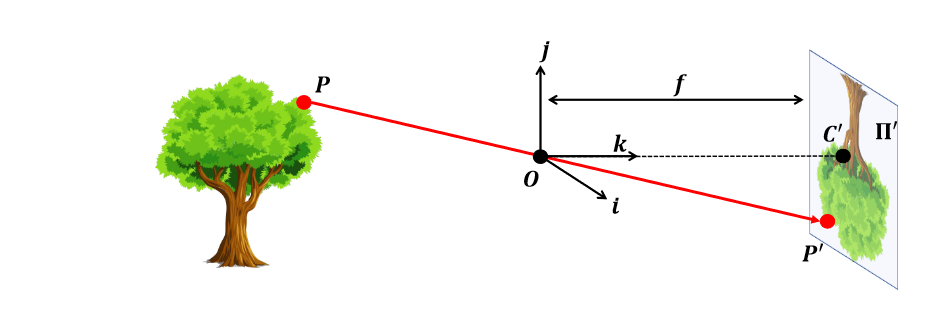

<p align="center">
    <br>
    <em> <b> Figure 1. Basic Pinhole Camera Model . </b> </em>
</p>

[source](https://web.stanford.edu/class/cs231a/course_notes/01-camera-models.pdf)

TL DR

- 3 main coordinate systems: World (3D), Camera (3D), and image plane (2D)
- The surface that light is focused on after passing through the aperture is known as the [image plane](https://www.photokonnexion.com/definition-focal-plane-film-plane/)
- The distance between the image plane and aperture is known as the focal length (f)
- We can use similar triangles to derive a relationship between the 3D world and 2D image plane
- The location the an object is projected to on the image plane depends on physical distance (z) and focal length (f)


In a basic pinhole camera model, light passes through a single point (O) and is projected onto what is called the image plane. The projected object on the image plane (also known as a virtual image) is scaled down version of the original object. So a point P = (x, y, z) in the 3D world is projected onto the image plane at P' = (x', y'), where the points on the image plane are represented in physical units (e.g. mm). The intermediate coordinate system with the origin at point O is referred to as the camera coordinate frame. We use similar triangles and derive a relationship between the 3D world and the 2D image space. We can do this using similar triangles as shown below in figure 2. (Note: figure 2 only shows a cut of the y and z axes, to consider the x and z axes simply replace the y with an x).

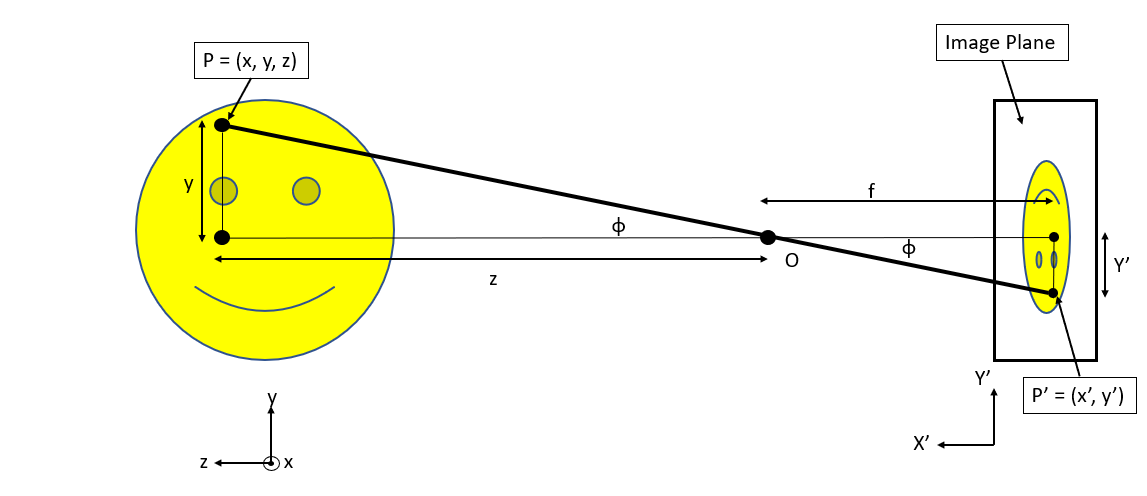

<p align="center">
    <br>
    <em> <b> Figure 2. Similar Triangles in pinholde camera model. </b> </em>
</p>

$$ \text{We notice a common angle } \phi \text{ as well as 2 similar triangles (O, (0,0,z), P) and OC'P'. Using Basic trigonometry we can derive the relationship} $$

$$ \text{tan} ( \phi ) = \frac{\text{opposite}}{\text{adjacent}}$$

<br>
$$ \text{ Now we can derive the relationship for the vertical and horizontal axes } $$

<br>

$$ 
\begin{align*}
\text{tan} ( \phi ) = \frac{y'}{f} &= \frac{y}{z} \rightarrow y' = f \frac{y}{z}\\
\text{tan} ( \phi ) = \frac{x'}{f} &= \frac{x}{z} \rightarrow x' = f \frac{x}{z} 
\end{align*}
$$

We can see that the object distance and focal length impact where the object will be projected to on the image plane

## **Lenses (Optional)**

Real cameras have lenses, figure 3 shows a simple lens model

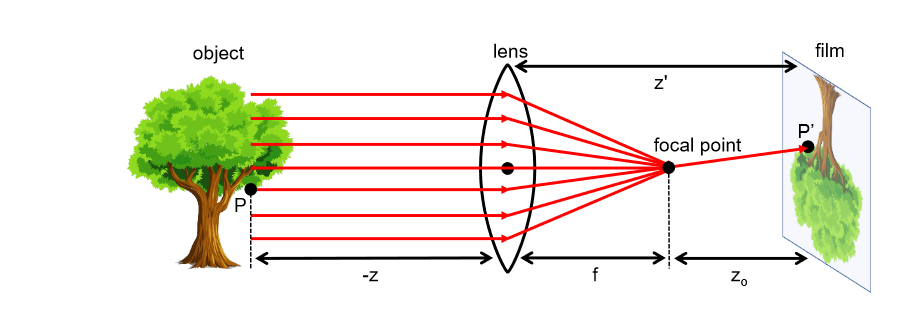


<p align="center">
    <br>
    <em> <b> Figure 3. Simple Lens Model. </b> </em>
</p>

[source](https://web.stanford.edu/class/cs231a/course_notes/01-camera-models.pdf)

TL-DR

- All rays of light that are emitted by some
point P are refracted by the lens such that they converge to a single point P' on the image plane (This only holds for certain points).
- The lense focuses all light rays traveling parallel to the optical axis to one point known as the focal point
- The focal point is analagous to the aperture in the Pin Hole Camera model
- The distance between the focal point and the center of the lens is known as the focal length f.

In a lense model all rays of light that are emitted by some
point P are refracted by the lens such that they converge to a single point P' on the image plane. However This only holds for certain points, if a point Q is too close to the lense then it will appear blurry. This is because it will be out of focus. The lense focuses all light rays traveling parallel to the optical axis to one point known as the focal point. This focal point is analagous to the aperture in the pinhole camera model. The distance between the focal point and the center of the lens is known as the focal length f. We can arrive at a similar relation between the 3D world and 2D image space using a thin lens model:

$$ 
\begin{align*}
x' &= (f + z_0) \frac{x}{z} \\
y' &= (f + z_0) \frac{y}{z}
\end{align*}
$$

The derivation is outside the scope of this tutorial

<br>
<br>

With a real camera lens, we will have different types of distortion. One type of distortion is known as radial distortion and is shown below in figure 4.

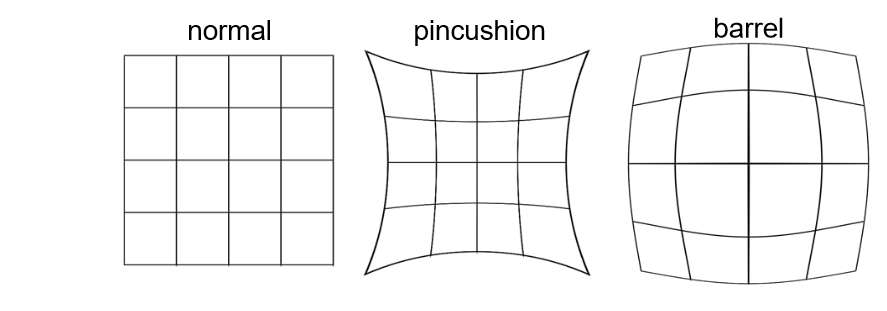

<p align="center">
    <br>
    <em> <b> Figure 4. Different Type of Radial Distortion. </b> </em>
</p>

[source](https://web.stanford.edu/class/cs231a/course_notes/01-camera-models.pdf)

## **The Forward Imaging model**

Quoted from [source](https://web.stanford.edu/class/cs231a/course_notes/01-camera-models.pdf)

The projection from 3D space to 2D space is known as a projective transformation, This projection of 3D points into the image plane does not directly correspond to what we see in actual digital images for several reasons. First, points in the digital images are, in general, in a different reference system than those in the image plane. Second, digital images are divided into discrete pixels, whereas points in the image plane are continuous. Finally, the physical sensors can introduce non-linearity such as distortion to the mapping. To account for these differences, we will introduce a number of additional transformations that allow us to map any point from the 3D world to pixel coordinates.

For practical purposes we will use the pinhole camera model and we will account for different types of distortions





The object of the forward imaging model is to map a point from the 3D world coordinate system to the 2D image plane. The model can br broken down into 2 main parts, the first part transforms a point from the 3D world to the (3D) camera coordinate frame, the next part transforms a point from the (3D) camera coordinate frame to the (2D) image plane. We will focus on the latter part first where we will derive the Intrinsic Matrix

### **Intrinsic Matrix**

Picking up from the pinhole camera model, we have the following relationship between the image plane and the 3D world:

$$ x_i = f \frac{x_c}{z_c}, \quad y_i = f \frac{y_c}{z_c} $$

(We adopt a slight change in notation to dentote image, camera, and world coordiantes)

The values $x_i$ and $y_i$here are in real units (e.g. mm), but digital images have units of pixels. So to transform them into pixels we must take pixel densities into account.

$$ 
m_x \rightarrow \frac{\text{horiztonal pixels}}{\text{mm}}, \quad
m_y \rightarrow \frac{\text{vertical pixels}}{\text{mm}}
$$

Notice that we can have different pixel densities for the x (horizontal) and y (vertical) directions, if the $m_x = m_y$ then we have square pixels, otherwise the pixels are rectangular.

$$ 
u = m_x f \frac{x_c}{z_c} \rightarrow u = f_x \frac{x_c}{z_c}
\\
v = m_y f \frac{y_c}{z_c} \rightarrow v = f_y \frac{y_c}{z_c}
$$

Now we have discrete $u$, $v$ pixel locations instead of continous $x_i$ and $y_i$ locations. We now have focal length in terms of pixels. Notice how if $m_x \neq m_y$, then we will have different $f_x$ and $f_y$ focal lengths.

Now we need to account for the image center as it's represented by a computer. The point C' in our pinhole camera model was the true center of the image plane, but a computer usually represents the center at one of the corners. We can add offsets to account for this. In Python the image center is at the top left corner, and the offsets are just half of the width and height. Now we have the final equations for transforming a point from the (3D) camera coordinate frame to the (2D) image plane.

$$ 
u = f_x \frac{x_c}{z_c} + o_x
\\
v = f_y \frac{y_c}{z_c} + o_y
$$

These equations are non-linear (since we are dividing by $z_c$). We would like to have a linear transform, but how? The answer is with homogenuous coordinates.

If $x = (u, v)$ is a Euclidean coordinate, the it's homogeneous representation is $\tilde{x} = (\tilde{u}, \tilde{v}, \tilde{w})$, where $\tilde{w}) \neq 0$. Typically we will set $\tilde{w} = 1$ To transform from homogeneous back to Euclidean we get:
$$
u = \frac{\tilde{u}}{\tilde{w}}, \quad v = \frac{\tilde{v}}{\tilde{w}}
$$

Now we can represent a point in the image plane as $P = (u, v, 1)$ and $P_c = (x_c, y_c, z_c, 1)$. Now we can derive the linear transform:

$$
\begin{align*}
P' = z_c \begin{bmatrix} u \\ v \\ 1 \end{bmatrix} 
= \begin{bmatrix} z_c u \\ z_c v \\ z_c \end{bmatrix}
= \begin{bmatrix}
      f_x x_c + z_c 0_x \\
      f_y y_c + z_c 0_y \\
      z_c
  \end{bmatrix}
= \begin{bmatrix}
      f_x & 0 & o_x & 0 \\
      0 & f_y & o_y & 0 \\
      0 & 0 & 1 & 0
  \end{bmatrix}
  \begin{bmatrix}
      x_c \\ y_c \\ z_c \\ 1
  \end{bmatrix}
=
M_{int}P_c
\end{align*}
$$


The matrix $M_{int} = \begin{bmatrix}
      f_x & 0 & o_x & 0 \\
      0 & f_y & o_y & 0 \\
      0 & 0 & 1 & 0
  \end{bmatrix}$ 
  is known as the intrinsic matrix
  
The parameters: $f_x$, $f_y$, $o_x$, and $o_y$ are known as intrinsic parameters since they depend on the camera's internal geometry. 

The intrinisc matrix can be deomposed into: $M_{int} = \begin{bmatrix}
      f_x & 0 & o_x\\
      0 & f_y & o_y\\
      0 & 0 & 1
  \end{bmatrix}
  \begin{bmatrix} I & 0 \end{bmatrix}
  = K \begin{bmatrix} I & 0 \end{bmatrix}
  $

  <br>

  Where $K = \begin{bmatrix}
      f_x & 0 & o_x\\
      0 & f_y & o_y\\
      0 & 0 & 1
  \end{bmatrix}$, $K$ is known as the calibration matrix

<font color='white'>parallel camera translation</font> 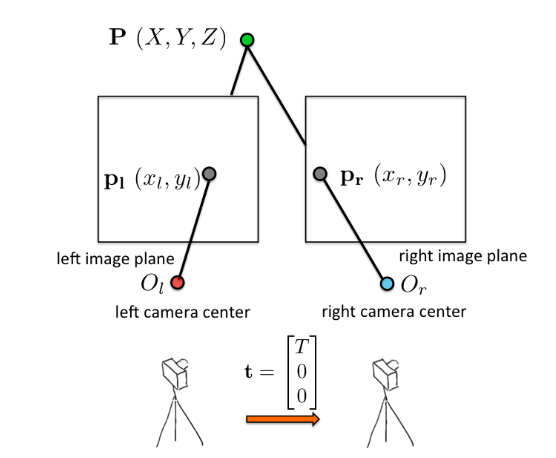


<p align="center">
    <br>
    <em> <b> Figure 1. Basic Parallel Stereo Vision Scenario. </b> </em>
</p>


The object at point P is projected to the images captured by each camera. We can see that the image location (perspective) of the object is different for each camera, this is called the disparity. If the images have been rectified, an object location on the left image will have the same y-value location on the right image. The only difference in location will be the x-value. This is why image rectification is needed, it makes the math much easier! This leads to a formal definition of disparity, it is simply the difference between left image x-location and right image x-location.

<br>
$$ d = x_l - x_r $$
<br>
$$\text{NOTE: } x_l \text{ and } x_r \text{ are pixel locations referenced from each camera's origin.}$$

Finding the matching pixel locations in each image is known as [stereo matching](https://www.cs.cmu.edu/~16385/s17/Slides/13.2_Stereo_Matching.pdf). It is a complex problem that we will learn about in a later tutorial.




### **So how do we compute the depth?**

Let's take a look at this image from these [lecture notes](http://www.cs.toronto.edu/~fidler/slides/2015/CSC420/lecture12_hres.pdf).

<font color='white'>depth computation</font>  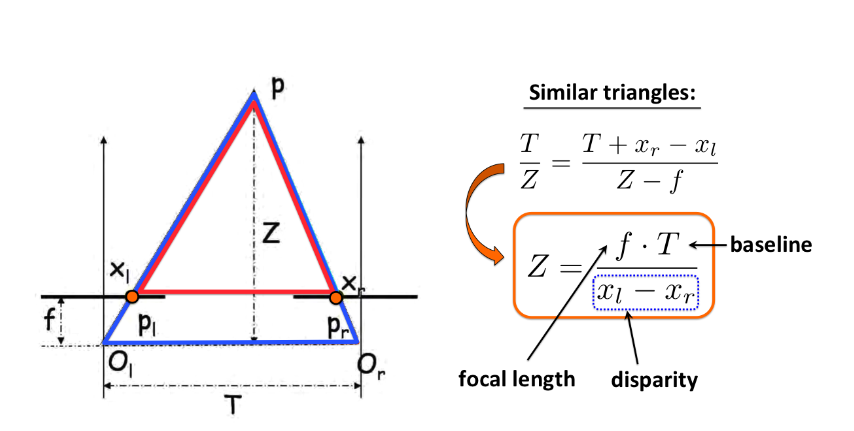



<p align="center">
    <br>
    <em> <b> Figure 2. Parallel Stereo Depth Computation  </b> </em>
</p>

The image above illustrates how triangluation is used to measure the depth of an object using images from the 2 cameras. In stereo vision, triangulation is the process of determing a 3D point using it's location in 2 or more images. The equation for finding the distance based on the disparity is presented above, but a more complete derivation can be found [here](https://johnwlambert.github.io/stereo/).

The Distance between the 2 cameras is known as the Baseline (or base). The focal length is the distance between the camera lense and image center, and it is typically assumed that it is the same for both cameras. The focal length will impact where the object is projected on each image and is therefore necessary for the depth computation. 

The computed depth Z has the same units as the baseline. Remember that the disparity is in units of pixels, so the means that the focal length must also be in units of pixels for them to cancel eachother out. To get focal length in units of pixels we can do the following computation:

$$ F_{pixels}  =  F_{mm} * \frac{\text{ImageWidth}_{pixels}}{\text{SensorWidth}_{mm}} $$

Where Image Width and Sensor Width are parameters, where Sensor Width may need to be [computed](https://www.ni.com/en-us/support/documentation/supplemental/18/calculating-camera-sensor-resolution-and-lens-focal-length.html#section--23253415https://www.ni.com/en-us/support/documentation/supplemental/18/calculating-camera-sensor-resolution-and-lens-focal-length.html#section--23253415)
<br>

**Takeaway:** <br>
The disparity is proportional to the baseline camera distance and is also inversely proportional to depth. So computing the disparity is the key to computing the depth.

### **One final concept**
To get data from our image to the 3D world (Euclidean Space) and vica versa we need a 3x4 [projection matrix](https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/EPSRC_SSAZ/node3.html). See [also](https://en.wikipedia.org/wiki/Camera_matrix). The camera projection matrix is derived from the [pinhole cameral model](https://en.wikipedia.org/wiki/Pinhole_camera_model). Understanding these concepts is very involved and we will cover this in a future tutorial.

## **Download the Data**
 Let's download the camera calibration data!

In [ ]:
!wget https://www.me.psu.edu/brennan/ME545/2012/FinalProjects/Mangus_3DCameraCalibration/Sample_Calibration_Images.zip

--2022-09-03 17:32:30--  https://www.me.psu.edu/brennan/ME545/2012/FinalProjects/Mangus_3DCameraCalibration/Sample_Calibration_Images.zip
Resolving www.me.psu.edu (www.me.psu.edu)... 146.186.145.12
Connecting to www.me.psu.edu (www.me.psu.edu)|146.186.145.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2160962 (2.1M) [application/x-zip-compressed]
Saving to: ‘Sample_Calibration_Images.zip’

Sample_Calibration_ 100%[===================>]   2.06M   397KB/s    in 7.2s    

2022-09-03 17:32:38 (295 KB/s) - ‘Sample_Calibration_Images.zip’ saved [2160962/2160962]



In [ ]:
!jar xf Sample_Calibration_Images.zip

#### Base Library Import

In [ ]:
import os
from glob import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)

### Get data

In [ ]:
DATA_PATH = r'2011_09_26/2011_09_26_drive_0106_sync'

left_image_paths = sorted(glob(os.path.join(DATA_PATH, 'image_02/data/*.png')))
right_image_paths = sorted(glob(os.path.join(DATA_PATH, 'image_03/data/*.png')))

print(f"Number of left images: {len(left_image_paths)}")
print(f"Number of right images: {len(right_image_paths)}")

Number of left images: 227
Number of right images: 227
